# DAT210x - Programming with Python for DS

## Module4- Lab3

### Lab Assignment 3
You're not quite done with chronic kidney disease yet—we still need to beat it! In the previous lab assignment, you focused only on three features out of the entire dataset: **bgr, rc, and wc**. That should have seemed strange to you. How did we know to direct your attention only to those features? The answer, of course, is through PCA. By running PCA on the raw dataset data, we were able to find suitable candidate features to show the importance of feature scaling. For this lab, there will be no starter code. Copy your finished Lab 2, **assignment2.py** file over as **assignment3.py** and start working from that.

<ol>
<li>Head back over to the dataset page (or you can look at the kidney_disease.names file in your /Module4/Datasets/ directory). Each column has a type listed, e.g. numeric, nominal, etc. Here is a formatted list of the nominal features for your copy and pasting pleasure:

> **['id', 'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']**

Instead of using an indexer to select just the **bgr, rc, and wc**, alter your assignment code to **drop all the nominal features** listed above. Be sure you select the right axis for columns and not rows, otherwise Pandas will complain!
<li>Right after you print out your dataset's dtypes, add an exit() so you can inspect the results. Does everything look like it should / properly numeric? If not, make code changes to coerce the remaining column(s).
<li>Run your assignment and then answer the questions below.
<li>Alter your code so that you only drop the id and classification columns. If you loaded your dataset properly, you won't have to drop the id column, because it wouldn't have been included as a feature. For the remaining 10 nominal features, properly encode them by as explained in the Feature Representation section by creating new, boolean columns using Pandas .get_dummies(). You should be able to carry that out with a single line of code. Run your assignment again and see if your results have changed at all.
Important Notes:

Once you've completed this lab, be sure to drop by the Dive Deeper section and read the article on using PCA on boolean features! Also, it's important to keep in mind that PCA is an unsupervised learning technique. It neither knows or even cares about your data's labels and classifications. In the previous two labs, you used a pre-labeled dataset only to see how applying PCA transformations can effect other machine learning modeling process further down the analysis pipeline.

This code is intentionally missing! Read the directions on the course lab page!

In [109]:
# .. your code here ..

In [123]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import helper
%matplotlib inline
from sklearn import preprocessing

In [124]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

In [125]:
# Do * NOT * alter this line, until instructed!
scaleFeatures = False

In [128]:
df = pd.read_csv('Datasets/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [129]:
# Create some color coded labels; the actual label feature will be removed prior to executing PCA, since it's unsupervised.
# You're only labeling by color so you can see the effects of PCA.
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

In [130]:
df = df.drop(labels=['id', 'classification'], axis=1)
df = df.reset_index(drop=True)
nominal_ = ['rbc', 'pc', 'pcc', 'ba', 'htn','dm', 'cad', 'appet', 'pe', 'ane']

df = df.dropna(axis=0)

# TODO: use .get_dummies() on nominal features
df = pd.get_dummies(df, columns=nominal_)


In [131]:
# nom=['id', 'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
# nom=['id', 'classification']

# df.dropna(axis=0,how='any',inplace=True)
# df.drop(labels=nom,axis=1,inplace=True)
# break();

# df.drop?

In [132]:
df.head()
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
rbc_abnormal        uint8
rbc_normal          uint8
pc_abnormal         uint8
pc_normal           uint8
pcc_notpresent      uint8
pcc_present         uint8
ba_notpresent       uint8
ba_present          uint8
htn_no              uint8
htn_yes             uint8
dm_no               uint8
dm_yes              uint8
cad_no              uint8
cad_yes             uint8
appet_good          uint8
appet_poor          uint8
pe_no               uint8
pe_yes              uint8
ane_no              uint8
ane_yes             uint8
dtype: object

In [117]:
df.pcv=pd.to_numeric(df.pcv,errors='coerce')
df.wc=pd.to_numeric(df.wc,errors='coerce')
df.rc=pd.to_numeric(df.rc,errors='coerce')

In [118]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv        int64
wc         int64
rc       float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [119]:
df.count()

age      158
bp       158
sg       158
al       158
su       158
rbc      158
pc       158
pcc      158
ba       158
bgr      158
bu       158
sc       158
sod      158
pot      158
hemo     158
pcv      158
wc       158
rc       158
htn      158
dm       158
cad      158
appet    158
pe       158
ane      158
dtype: int64

In [120]:
# TODO: PCA Operates based on variance. The variable with the greatest variance will dominate. Go ahead and peek into your data using
# a command that will check the variance of every feature in your dataset. Print out the results. Also print out the results of
# running .describe on your dataset.
#
# Hint: If you don't see all three variables: 'bgr','wc' and 'rc', then you probably didn't complete the previous step properly.
#
# .. your code here ..
print (df.var())
print ("This is the describe output: ", df.describe())

age     2.406297e+02
bp      1.248891e+02
sg      3.023865e-05
al      1.996936e+00
su      6.616141e-01
bgr     4.217182e+03
bu      2.246322e+03
sc      9.471717e+00
sod     5.609143e+01
pot     1.208501e+01
hemo    8.307100e+00
pcv     8.290402e+01
wc      9.777380e+06
rc      1.039104e+00
dtype: float64
This is the describe output:                age          bp          sg          al          su         bgr  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean    49.563291   74.050633    1.019873    0.797468    0.253165  131.341772   
std     15.512244   11.175381    0.005499    1.413130    0.813397   64.939832   
min      6.000000   50.000000    1.005000    0.000000    0.000000   70.000000   
25%     39.250000   60.000000    1.020000    0.000000    0.000000   97.000000   
50%     50.500000   80.000000    1.020000    0.000000    0.000000  115.500000   
75%     60.000000   80.000000    1.025000    1.000000    0.000000  131.750000   
max     83.00

In [121]:
# TODO: This method assumes your dataframe is called df. If it isn't, make the appropriate changes. Don't alter the code
# in scaleFeatures() just yet though!
#
# .. your code adjustment here ..
if scaleFeatures: df = helper.scaleFeatures(df)

In [122]:
# TODO: Run PCA on your dataset and reduce it to 2 components. Ensure your PCA instance is saved in a variable called 'pca',
# and that the results of your transformation are saved in 'T'.
#
# .. your code here ..
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df)
T = pca.transform(df)

ValueError: could not convert string to float: 'no'

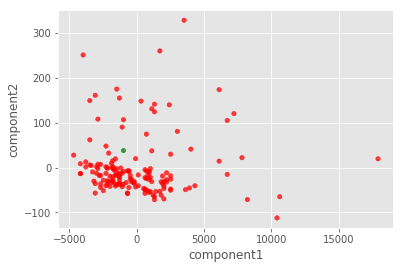

In [108]:
# Plot the transformed data as a scatter plot. Recall that transforming the data will result in a NumPy NDArray. You can
# either use MatPlotLib to graph it directly, or you can convert it to DataFrame and have pandas do it for you.
#
# Since we've already demonstrated how to plot directly with MatPlotLib in Module4/assignment1.py, this time we'll convert
# to a Pandas Dataframe.
#
# Since we transformed via PCA, we no longer have column names. We know we are in P.C. space, so we'll just define the
# coordinates accordingly:
ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c = labels, alpha=0.75, ax=ax)
plt.show()